<a href="https://colab.research.google.com/github/MFH97/Artificial-Intelligence/blob/main/K_Means(from_scratch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementing K-Means Clustering in Python From Scratch

We will be working on the loan prediction dataset that you can download [Dataset](https://drive.google.com/file/d/1ZzEouo7lRJvajxK6jLM2K_p9xAwGw1tS/view?usp=sharing). I encourage you to read more about the dataset and the problem statement of Loan Predicition here. This will help you visualize what we are working on (and why we are doing this).

**How K-Means Works in This Code**

1. Starts with initial centroids (assumed to be defined earlier).

2. Assigns each point to the nearest centroid (Euclidean distance).

3. Updates centroids to the mean of their assigned points.

4. Repeats until centroids stop moving (diff = 0).

In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


 we will be taking only two variables from the data – “LoanAmount” and “ApplicantIncome.” This will make it easy to visualize the steps as well. Let’s pick these two variables and visualize the data points:

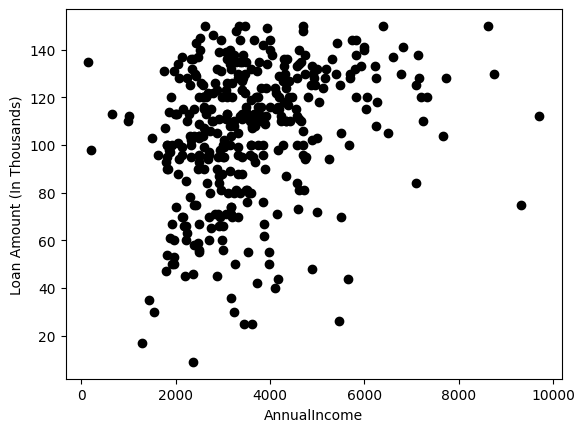

In [3]:
X = data[["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

Steps 1 and 2 of K-Means were about choosing the number of clusters (k) and selecting random centroids for each cluster. We will pick 3 clusters and then select random observations from the data as the centroids:

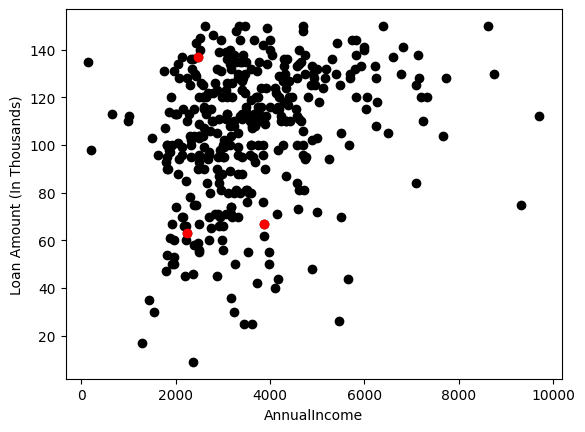

In [4]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

Here, the red dots represent the 3 centroids for each cluster. Note that we have chosen these points randomly, and hence every time you run this code, you might get different centroids.

Next, we will define some conditions to implement the K-Means Clustering algorithm. Let’s first look at the code:

1. Initialization

In [ ]:
diff = 1  # Initialize difference to enter the loop
j = 0     # Iteration counter

diff is set to 1 to ensure the while loop runs at least once.

j keeps track of the number of iterations.

2. Main Loop (while diff != 0)
The loop continues until the centroids stop changing (diff = 0).

a. Create a fresh copy of the data

In [ ]:
XD = X[["ApplicantIncome", "LoanAmount"]].copy()

Creates a copy of the relevant columns (ApplicantIncome, LoanAmount) to avoid modifying the original data accidentally.

b. Calculate distances to each centroid

In [ ]:
for i, (_, row_c) in enumerate(Centroids.iterrows(), 1):
    X.loc[:, i] = np.sqrt(
        (XD["ApplicantIncome"] - row_c["ApplicantIncome"])**2 +
        (XD["LoanAmount"] - row_c["LoanAmount"])**2
    )

enumerate(Centroids.iterrows(), 1):

Loops over each centroid (row_c).

i is the cluster number (starting from 1).

Euclidean distance calculation:

Computes the distance from every data point to centroid i.

Formula:

Distance
=....

Stores the result in column i of X.

c. Assign each point to the nearest cluster

In [ ]:
distance_cols = [i for i in range(1, K+1)]
X.loc[:, "Cluster"] = X[distance_cols].idxmin(axis=1)

distance_cols: List of columns containing distances ([1, 2, ..., K]).

idxmin(axis=1): Finds the nearest centroid for each row (data point).

Updates the "Cluster" column with the closest cluster number.

d. Update centroids


In [ ]:
Centroids_new = X.groupby("Cluster")[["LoanAmount", "ApplicantIncome"]].mean()

Computes the new centroids by taking the mean of all points in each cluster.

e. Check for convergence

In [ ]:
if j == 0:
    diff = 1  # Force at least one more iteration
else:
    diff = (Centroids_new - Centroids).abs().sum().sum()
    print(diff)  # Optional: Track convergence progress

First iteration (j=0) → Forces another iteration.

Subsequent iterations → Computes the total difference between old and new centroids.

(Centroids_new - Centroids).abs().sum().sum() sums up all absolute differences.

If diff = 0, the centroids have stabilized, and the loop exits.

f. Update centroids for the next iteration

In [ ]:
Centroids = Centroids_new
j += 1

Updates Centroids for the next iteration.

Increments the iteration counter j.

In [7]:
diff = 1
j = 0

while diff != 0:
    # Create a fresh copy of the data for distance calculations
    XD = X[["ApplicantIncome", "LoanAmount"]].copy()

    # Calculate distances to each centroid
    for i, (_, row_c) in enumerate(Centroids.iterrows(), 1):
        # Calculate Euclidean distance using vectorized operations
        X.loc[:, i] = np.sqrt(
            (XD["ApplicantIncome"] - row_c["ApplicantIncome"])**2 +
            (XD["LoanAmount"] - row_c["LoanAmount"])**2
        )

    # Assign to nearest cluster
    distance_cols = [i for i in range(1, K+1)]
    X.loc[:, "Cluster"] = X[distance_cols].idxmin(axis=1)

    # Update centroids
    Centroids_new = X.groupby("Cluster")[["LoanAmount", "ApplicantIncome"]].mean()

    # Check convergence
    if j == 0:
        diff = 1
    else:
        diff = (Centroids_new - Centroids).abs().sum().sum()
        print(diff)

    Centroids = Centroids_new
    j += 1

0.0


<ipython-input-7-3a0a5c007c33>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 2 2 3 2 2 2 2 2 1 1 1 1 2 3 2 1 2 1 2 1 2 1 1 2 1 1 1 2 2 1 1 1 3 3 2 1
 2 2 1 1 2 2 1 1 2 2 1 2 3 1 2 1 1 1 2 1 1 1 2 1 2 2 1 1 1 2 2 1 2 1 2 3 2
 3 2 1 2 1 2 2 1 2 2 1 1 1 1 1 2 2 2 1 3 2 2 2 2 2 3 1 2 2 2 1 1 1 2 1 2 2
 1 1 2 2 1 1 1 2 1 2 1 1 1 2 1 2 1 1 3 2 1 2 1 1 1 2 1 2 3 1 2 1 2 2 1 1 1
 3 2 3 1 3 3 3 2 2 1 2 3 1 1 2 3 1 1 1 2 2 2 2 1 2 2 1 1 2 2 2 2 1 1 2 1 2
 3 1 1 2 2 2 1 2 1 1 2 2 2 2 3 1 1 2 1 2 1 2 1 1 2 1 2 2 3 1 2 2 2 2 2 3 2
 1 1 2 1 1 2 3 3 2 1 2 2 1 3 1 2 3 1 3 1 1 2 2 3 2 2 2 1 2 2 1 2 2 2 2 2 1
 2 2 1 2 2 2 2 3 2 2 3 2 1 3 2 2 3 3 2 1 2 3 1 1 1 1 1 2 2 1 2 3 1 1 1 3 1
 1 3 2 2 1 2 1 2 2 2 2 2 1 2 2 1 1 1 2 1 2 2 2 1 1 1 1 1 2 1 2 2 1 2 2 3 1
 2 3 1 1 2 1 2 1 2 1 2 2 1 2 1 2 1 3 2 1 3 1 1 1 2 2 3 2 2 2 2 2 2 2 2 2 2
 1 2 2 1 1 2 3 2 2 1 1]' has dtype incompatible with int64, please explicitly cast to a compatibl

**When diff = 0, the algorithm has converged.**

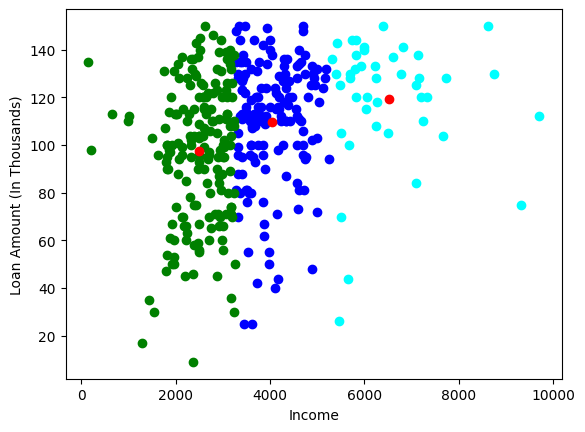

In [8]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

Here, we can clearly visualize three clusters. The red dots represent the centroid of each cluster.

Reference: [link text](https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/)